<a href="https://colab.research.google.com/github/CO-CO-LAB/Data-Analysis/blob/main/Working_with_different_file_formats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with different file formats



In [1]:
import pandas as pd
import numpy as np
import seaborn
import lxml
import openpyxl
import requests

In [2]:
# URL: CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/addresses.csv"

# Downloading CSV File with Minimum Data Set for Username or Email Onboarding
response = requests.get(url)
if response.status_code == 200:
    with open("Onboarding.csv", "wb") as file:
        file.write(response.content)
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

# Loading the CSV file into a DataFrame
df = pd.read_csv("Onboarding.csv", header=None)

# Displaying the DataFrame
print(df)

                       0         1                                 2  \
0                   John       Doe                 120 jefferson st.   
1                   Jack  McGinnis                      220 hobo Av.   
2          John "Da Man"    Repici                 120 Jefferson St.   
3                Stephen     Tyler  7452 Terrace "At the Plaza" road   
4                    NaN  Blankman                               NaN   
5  Joan "the bone", Anne       Jet               9th, at Terrace plc   

             3    4      5  
0    Riverside   NJ   8075  
1        Phila   PA   9119  
2    Riverside   NJ   8075  
3     SomeTown   SD  91234  
4     SomeTown   SD    298  
5  Desert City   CO    123  


In [3]:
df.columns =['First Name', 'Last Name', 'Location ', 'City','State','Area Code']

In [4]:
df

,First Name,Last Name,Location,City,State,Area Code
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119
2,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075
3,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234
4,NaN,Blankman,NaN,SomeTown,SD,298
5,"Joan ""the bone"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123


In [5]:
# choosing specific columns and show as a table
df[["First Name", "Last Name"]]

,First Name,Last Name
0,John,Doe
1,Jack,McGinnis
2,"John ""Da Man""",Repici
3,Stephen,Tyler
4,NaN,Blankman
5,"Joan ""the bone"", Anne",Jet


In [7]:
# working with loc and iloc
df.loc[[0,1], ["First Name", "Last Name"]]

,First Name,Last Name
0,John,Doe
1,Jack,McGinnis


In [8]:
df.loc[[0,1]]

,First Name,Last Name,Location,City,State,Area Code
0,John,Doe,120 jefferson st.,Riverside,NJ,8075
1,Jack,McGinnis,220 hobo Av.,Phila,PA,9119


In [9]:
df.iloc[[0,1], [0,2]]

,First Name,Location
0,John,120 jefferson st.
1,Jack,220 hobo Av.


In [11]:
df.iloc[0:3, 0:2]

,First Name,Last Name
0,John,Doe
1,Jack,McGinnis
2,"John ""Da Man""",Repici


In [16]:
df = pd.DataFrame(np.array([[1,2,3],[4,4,5],[8,9,8]]), columns=['id1','id2', 'id3'])
df

,id1,id2,id3
0,1,2,3
1,4,4,5
2,8,9,8


In [19]:
df.transform(func=lambda x:(x+1)*(x+2))

,id1,id2,id3
0,6,12,20
1,30,30,42
2,90,110,90


In [20]:
df.transform(func = ['sqrt'])

,id1,id2,id3
,sqrt,sqrt,sqrt
0,1.000000,1.414214,1.732051
1,2.000000,2.000000,2.236068
2,2.828427,3.000000,2.828427


## JSON file Format

In [23]:
import json
me = {
    'first_name' : 'Narges',
    'last_name' : 'Sobhani',
    'age' : 30,
    'address': {
        "streetAddress": "123 1nd Street",
        "city": "Vancouver",
        "Province": "BC",
        "postalCode": "ABC 123"
    }
}

###Writing JSON to a File

In [24]:
with open('me.json', 'w') as f:
    json.dump(me, f)

In [29]:
json_object = json.dumps(me, indent = 4)
json_object

'{\n    "first_name": "Narges",\n    "last_name": "Sobhani",\n    "age": 30,\n    "address": {\n        "streetAddress": "21 1nd Street",\n        "city": "Vancouver",\n        "Province": "BC",\n        "postalCode": "ABC 123"\n    }\n}'

In [30]:
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [31]:
print(json_object)

{
    "first_name": "Narges",
    "last_name": "Sobhani",
    "age": 30,
    "address": {
        "streetAddress": "21 1nd Street",
        "city": "Vancouver",
        "Province": "BC",
        "postalCode": "ABC 123"
    }
}


### Reading JSON to a File

In [32]:
# loading json content from a json file into a dictionary

# Opening JSON file
with open('sample.json', 'r') as openfile:

    # Reading from json file
    json_object = json.load(openfile)

print(json_object)
print(type(json_object))

{'first_name': 'Narges', 'last_name': 'Sobhani', 'age': 30, 'address': {'streetAddress': '21 1nd Street', 'city': 'Vancouver', 'Province': 'BC', 'postalCode': 'ABC 123'}}
<class 'dict'>


## Reading the data from XLSX file

In [35]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/file_example_XLSX_10.xlsx"

# Downloading the file
response = requests.get(url)
with open("file_example_XLSX_10.xlsx", "wb") as file:
    file.write(response.content)

# Reading the Excel file into a DataFrame
df = pd.read_excel("file_example_XLSX_10.xlsx")

# Displaying the DataFrame
print(df)

   0 First Name  Last Name  Gender        Country  Age        Date    Id
0  1      Dulce      Abril  Female  United States   32  15/10/2017  1562
1  2       Mara  Hashimoto  Female  Great Britain   25  16/08/2016  1582
2  3     Philip       Gent    Male         France   36  21/05/2015  2587
3  4   Kathleen     Hanner  Female  United States   25  15/10/2017  3549
4  5    Nereida    Magwood  Female  United States   58  16/08/2016  2468
5  6     Gaston      Brumm    Male  United States   24  21/05/2015  2554
6  7       Etta       Hurn  Female  Great Britain   56  15/10/2017  3598
7  8    Earlean     Melgar  Female  United States   27  16/08/2016  2456
8  9   Vincenza    Weiland  Female  United States   40  21/05/2015  6548


## Writing with xml.etree.ElementTree

In [37]:
import xml.etree.ElementTree as ET

# creating the file structure
employee = ET.Element('employee')
details = ET.SubElement(employee, 'details')
first = ET.SubElement(details, 'firstname')
second = ET.SubElement(details, 'lastname')
third = ET.SubElement(details, 'age')
first.text = 'Shiv'
second.text = 'Mishra'
third.text = '23'

# creating a new XML file with the results
mydata1 = ET.ElementTree(employee)
# myfile = open("items2.xml", "wb")
# myfile.write(mydata)
with open("new_sample.xml", "wb") as files:
    mydata1.write(files)

In [39]:
# URL of the XML file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Sample-employee-XML-file.xml"

# Downloading the XML file
response = requests.get(url)
with open("Sample-employee-XML-file.xml", "wb") as file:
    file.write(response.content)

# Parse the XML file
tree = ET.parse("Sample-employee-XML-file.xml")
root = tree.getroot()

# Displaying the root tag
print(f"Root tag: {root.tag}")

Root tag: employees


In [40]:
# Parse the XML file
tree = ET.parse("Sample-employee-XML-file.xml")

# Getting the root of the XML tree
root = tree.getroot()

# Defining the columns for the DataFrame
columns = ["firstname", "lastname", "title", "division", "building", "room"]

# Initializing an empty DF
datatframe = pd.DataFrame(columns=columns)

# Iterating through each node in the XML root
for node in root:
    # Extracting text from each element
    firstname = node.find("firstname").text
    lastname = node.find("lastname").text
    title = node.find("title").text
    division = node.find("division").text
    building = node.find("building").text
    room = node.find("room").text

    # Creating a DataFrame for the current row
    row_df = pd.DataFrame([[firstname, lastname, title, division, building, room]], columns=columns)

    # Concatenating with the existing DataFrame
    datatframe = pd.concat([datatframe, row_df], ignore_index=True)


In [41]:
datatframe

,firstname,lastname,title,division,building,room
0,Shiv,Mishra,Engineer,Computer,301,11
1,Yuh,Datta,developer,Computer,303,02
2,Rahil,Khan,Tester,Computer,304,10
3,Deep,Parekh,Designer,Computer,305,14


In [44]:
from PIL import Image
from IPython.display import display

# URL of the image
url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg"

file_name = "dog.jpg"

# Downloading
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(file_name, "wb") as file:
        for chunk in response.iter_content(1024):
            file.write(chunk)

print(f"Image downloaded and saved as {file_name}")

Image downloaded and saved as dog.jpg


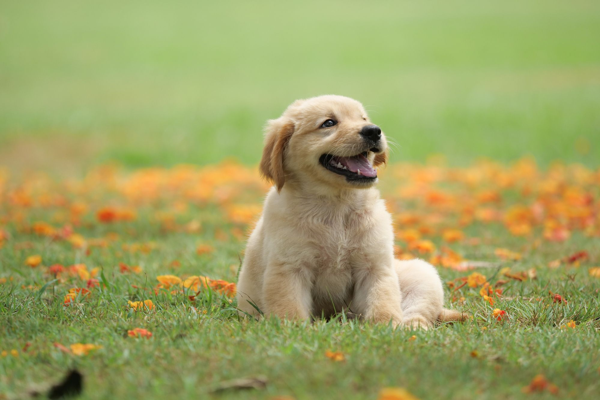

In [50]:
# Opening and displaying the image inline
image = Image.open(file_name)
image = image.resize((600, 400))

# Displaying
display(image)